### <strong> Group Project 2: Estimating the effect of a banking regulation </strong>

<strong>Group Name: The Jedi Council</strong>
<br>Group Members:
<br>Remy Masbatin (A0231979N)
<br>Canjie Shen (A0231902R)
<br>Philippine Gallot (A0231973B)
<br>Johnny Shollaj (A0231930N)
<br>Jiang Jinjing (A0231986U

### Preamble

In banking one of the core components of the services provided is lending money, in many instances by using the deposits of other clients.
However, due to certain certain restrictions and regulation it is not always possible to lend all the money,so the banks find alternative ways to exploit such resources. One of them is using the remaining resources to invest in the financial markets. 

However certain issues arise when banks are involved in trading.  A myriad of investment activities undertaken by the bank have been a significant source of risk for the banks leading to catastrophic unintended consequences, such as the financial crisis in 2008. Therefore, regulators concluded that something needs to be done to mitigate the risk associated with such ventures in the future. 

The Volcker's rule was supposed to be the antidote to the problem in hand. In it's core, Volcker's rule prohibits banks from conducting certain investment activities with their own accounts, and limits their ownership of and relationship with hedge funds and private equity funds. In more detail,  to limit the risk-taking of the companies' investment activities by Volcker's rule would reduce the size of the trading book (the size of the holdings of financial assets) relative to
the total assets (financial assets and loans), so the banks would focus mainly on the lending aspect of their business. 

Below, we aim to take a look at the effect that Volcker's Rule had on some of the most important banks, and most importantly whether it succeeded in mitigating the risks associated with their trading assets.

### (1) Did the banks decrease their trading assets after the announcement of the new regulation?

After conducting the necessary data exploration and transformation to the provided data, we can conclude that banks with high trading asset ratios reduced their trading assets to a greater degree when compared to banks with low trading asset ratios after the introduction of the Volcker Rule. To bolster that finding, we divided the banks in three groups:
<br>
a) average trading asset ratio greater than 3% - considered as banks with high trading asset ratios
<br>
b) average trading asset ratio less than 3% - considered as banks with low trading asset ratios
<br>
c) average trading asset ratio of the 10 bank holding companies with the highest trading asset ratio in the 16 quarters before announcement
<br>
The graph representing their data would look like the following

To conclude that we have a causal relationship, we need to eliminate other possible reasons that could explain a decrease in the size of the trading book (relative to assets). Therefore we conduct robustness test and check how the treatment affects hedge funds trading patterns and whether it aligns with the mentioned banks. 

Next, we utilized the Difference in Differences and found that the banks that had a relatively high trading asset ratio before the Volcker Rule, experience the strongest reduction in their trading asset ratios. This aligns with the preconceived notion and nature of Volckers Rule. Below we have the multivariate estimates of the enactment effect of the Volcker Rule. 

### $Y_i,_t = \alpha + \beta *$(after DFA * Affected BHC)$ + \gamma_i + \delta_t + X_i,_t + \epsilon_i,_t$

As we can see, in contrast to top 10 trading banks, hedge funds actually increased trading assets after the enactment of Volckers rule. More specifically, the top 10 trading BHCs experienced a harsher drop on the scaled trading assets as compared to the hedge funds, but also the rest of affected banks. We expand more on this on the 3rd question where we introduce the z-score to compare volatility spread among the different groups and how does the risk compare to the previous control and treatment groups. 

### 2. If they responded to the regulation, which banks responded most and which banks least?  Why?

Based on the abovementioned series of testing we were able to derive that banks responded to the regulation by significantly dropping their trading assets as compared to the period before the Volcker's Rule enactment. The banks which responded the most to the regulation are also the banks which were significantly more exposed to the activities now banned or limited by the Volcker Rule (which in our case are institutions with largest trading books allocation). Conversely, the bank holding companies which responded least are the banks which had zero trading asset ratios when the Volcker Rule was introduced, and therefore their response is also the weakest (since their model was not based on or relying on trading and investing their own funds to significant risks)
<br>

The reason for this is due to the nature of Volcker's Rule. The rule enactment discouraged banks from taking too much risk by barring them from using their own funds to make these types of investments to increase profits. Since the many of the banks relied more on investing their own funds to a higher extend of their overall trading assets, they were also more exposed and more affected by the rule. 

### 3. Remember robustness, and how should banks or regulators use these results?

In order to properly formulate the results in a form of prescriptive advice for the regulators we need to summarize the robust findings according to our tests: 
<br> a) First, the return on assets decreased significantly for all the banks. Experiencing larger decrease for those with larger exposure to Volcker's Rule.
<br> b) Second, asset return volatility of affected banks increased significantly.

We also have some non-robust findings, which also need to be taken into consideration are the following: 
<br> a) Affected banks have increased their capital asset ratio
<br> b) Affected banks have raised their trading risks and decreased the hedging of their banking business
<br> c) Affected banks have decreased their leverage , at least partly by selling equity


### Appendix: Referenced Code and Graphs

In [1]:
import time

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
from statsmodels.formula.api import ols

In [3]:
#read data
df=pd.read_csv('DiD_data.csv')

In [4]:
#data info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81560 entries, 0 to 81559
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rssd9001               81560 non-null  int64  
 1   rssd9999               81560 non-null  int64  
 2   bhc_avgtradingratio    41442 non-null  float64
 3   treat_3_b_avg          81560 non-null  int64  
 4   after_DFA_1            81560 non-null  int64  
 5   dep_roa1               56938 non-null  float64
 6   dep_leverage           57017 non-null  float64
 7   dep_lnassets           61771 non-null  float64
 8   dep_creditrisk_total3  44432 non-null  float64
 9   dep_cir                42382 non-null  float64
 10  dep_depositratio       79172 non-null  float64
 11  dep_loans_REratio      44432 non-null  float64
 12  dep_liquidity          55159 non-null  float64
 13  dep_cpp_bankquarter    81560 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 8.7 MB


,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
count,8.156000e+04,8.156000e+04,41442.000000,81560.000000,81560.000000,56938.000000,57017.000000,61771.000000,44432.000000,42382.000000,79172.000000,44432.000000,55159.000000,81560.000000
mean,1.803535e+06,2.009222e+07,0.002650,0.012482,0.451128,0.001844,0.093518,13.516361,0.027758,0.531455,0.681883,0.735931,0.053559,0.042398
std,8.030013e+05,3.327316e+04,0.020015,0.111022,0.497609,0.006116,0.042513,1.354361,0.033980,0.355984,0.112038,0.160457,0.051830,0.201497
min,1.020180e+06,2.004093e+07,0.000000,0.000000,0.000000,-0.387137,-0.762281,5.888878,0.000000,-12.478261,0.000000,0.000000,0.000230,0.000000
25%,1.118434e+06,2.006093e+07,0.000000,0.000000,0.000000,0.001246,0.073928,12.621573,0.009764,0.413383,0.635417,0.655918,0.024569,0.000000
50%,1.248304e+06,2.009033e+07,0.000000,0.000000,0.000000,0.002209,0.090160,13.233317,0.018046,0.502336,0.696680,0.764127,0.036075,0.000000
75%,2.537957e+06,2.012093e+07,0.000000,0.000000,1.000000,0.003119,0.108184,13.948256,0.032604,0.615253,0.750985,0.848875,0.062095,0.000000
max,3.836442e+06,2.015063e+07,0.429727,1.000000,1.000000,0.934277,1.157965,21.669949,0.734222,45.933334,0.998093,1.010109,0.843543,1.000000


In [5]:
#Transform str to date
df['rssd9999']=[time.strftime("%Y-%m-%d", time.strptime(str(i),'%Y%m%d')) for i in df['rssd9999']]
df.head()

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
0,1020180,2004-09-30,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0
1,1020180,2004-12-31,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0
2,1020180,2005-03-31,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0
3,1020180,2005-06-30,0.0,0,0,0.002647,0.081712,15.679702,0.013654,0.433771,0.571642,0.601042,0.023670,0
4,1020180,2005-09-30,0.0,0,0,0.002867,0.082944,15.661868,0.012456,0.400985,0.577408,0.581438,0.029793,0


In [6]:
# Devide bank into three group 
treatment_group=df[df['treat_3_b_avg']==1]  #average trading asset ratio greater than 3%
control_group=df[df['treat_3_b_avg']==0]    #average trading asset ratio less than 3%
#average trading asset ratio of the 10 bank holding companies with the highest trading asset ratio in the 16 quarters before announcement
top_10_bank_code=df[df['rssd9999']<'2009-09-30'].groupby('rssd9001').mean().sort_values('bhc_avgtradingratio',ascending=False)[:10].index
Top_10_group=df.loc[df['rssd9001'].isin(top_10_bank_code)]   

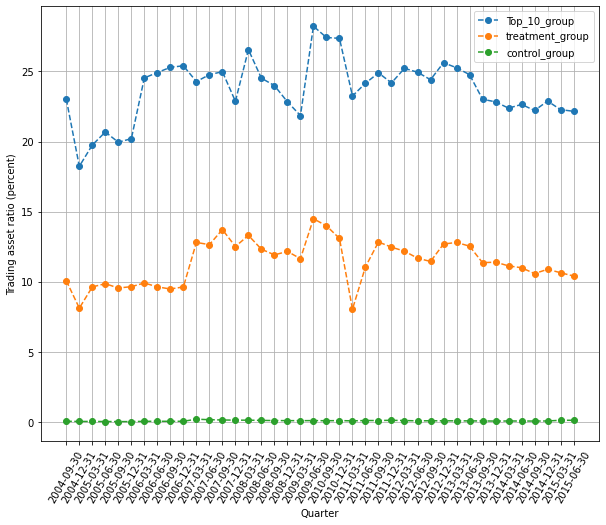

In [7]:
# Graph of Trading Asset Ratio of Banks in Three Different Groups
treatment_group_data=treatment_group.groupby('rssd9999').bhc_avgtradingratio.mean()
control_group_data=control_group.groupby('rssd9999').bhc_avgtradingratio.mean()
Top_10_group_data=Top_10_group.groupby('rssd9999').bhc_avgtradingratio.mean()
plt.figure(figsize=(10,8))
plt.xticks(rotation=60) 
plt.xlabel("Quarter")
plt.ylabel('Trading asset ratio (percent)')
plt.plot_date(Top_10_group_data.index,Top_10_group_data.values*100,'--',marker='o',label="Top_10_group")
plt.plot_date(treatment_group_data.index,treatment_group_data.values*100,'--',marker='o',label="treatment_group")
plt.plot_date(control_group_data.index,control_group_data.values*100,'--',marker='o',label="control_group")
plt.legend()
plt.grid()

In [8]:
treatment_group

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
38,1020201,2004-09-30,0.126453,1,0,0.002906,0.070028,18.610798,0.013813,0.339097,0.390303,0.758043,0.044461,0
39,1020201,2004-12-31,0.139026,1,0,0.002053,0.074122,18.764626,0.014689,0.414206,0.358281,0.647956,0.042322,0
40,1020201,2005-03-31,0.130043,1,0,0.002237,0.076953,18.768549,0.015002,0.357776,0.357660,0.651144,0.045373,0
41,1020201,2005-06-30,0.131771,1,0,0.001485,0.078767,18.788057,0.015216,0.372252,0.362995,0.642943,0.046566,0
42,1020201,2005-09-30,0.135333,1,0,0.001715,0.080054,18.818710,0.016574,0.325251,0.376771,0.623793,0.042985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81453,3587146,2007-09-30,NaN,1,0,NaN,NaN,19.031347,0.016125,0.533066,NaN,0.142534,NaN,0
81454,3587146,2011-03-31,NaN,1,1,NaN,NaN,NaN,NaN,NaN,0.578145,NaN,NaN,0
81455,3587146,2011-06-30,NaN,1,1,NaN,NaN,19.535666,0.022822,NaN,0.559882,0.164276,NaN,0
81456,3587146,2015-03-31,0.031755,1,1,0.002003,0.096149,19.787632,0.005142,0.691776,0.140705,0.143548,NaN,0


In [9]:
## Calculate Treating Effects
treatment_group_differences=treatment_group[treatment_group['rssd9999']>='2009-9-30'].bhc_avgtradingratio.mean()-treatment_group[treatment_group['rssd9999']<'2009-9-30'].bhc_avgtradingratio.mean()
control_group_differences=control_group[control_group['rssd9999']>='2009-9-30'].bhc_avgtradingratio.mean()-control_group[control_group['rssd9999']<'2009-9-30'].bhc_avgtradingratio.mean()
print('The Treatment Effect is {:.2f}%'.format((treatment_group_differences-control_group_differences)*100))

The Treatment Effect is 0.80%


### We need to plot the following:

In [10]:
#Fit following regression and show stats.summary

For Reference:
<br>
<strong>• rssd9001: </strong>Banking holding company code
<br>
<strong>• rssd9999:</strong> time
<br>
<strong>• bhc avgtradingratio:</strong> Trading asset ratio, ratio of trading assets to total assets
<br>
<strong>• treat 3 b avg:</strong> Affected BHC, dummy variable takes a value of one if the average trading asset ratio during the pre-DFA period
(Q3 2004 - Q2 2009) was equal to or larger than 3%, and zero otherwise.
<br>
<strong>• after DFA 1:</strong> After DFA dummy, dummy variable that equals one for all quarters between the third quarter of 2010 and the second quarter
of 2015, and zero for all quarters from the third quarter of 2004 to the second quarter of 2009
<br>
<strong>• dep roa1:</strong> Return on assets, net operating income divided by average total assets
<br>
<strong>• dep leverage:</strong> Leverage ratio, average equity divided by average total assets
<br>
<strong>• dep lnassets:</strong> Total assets, natural logarithm of total assets
<br>
<strong>• dep creditrisk total3:</strong> Non-performing loan ratio, past due and non accrual loans divided by total loans
<br>
<strong>• dep cir:</strong> Cost-income ratio, operating expenses divided by total income
<br>
<strong>• dep depositratio:</strong> Deposit ratio, average deposits divided by average total assets
<br>
<strong>• dep loans REratio:</strong> Real estate loan ratio, loans secured by real estate divided by total loans
<br>
<strong>• dep liquidity:</strong> Liquidity ratio, cash and balances at other depository institutions divided by total assets
<br>
<strong>• dep cpp bankquarter:</strong> CPP recipient indicator, capital Purchase Program indicator variable takes one if the bank is a current recipient of CPP funds in a given quarter, and zero otherwise

### $Y_i,_t = \alpha + \beta *$(after DFA * Affected BHC)$ + \gamma_i + \delta_t + X_i,_t + \epsilon_i,_t$

In [11]:
df.head(3)

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
0,1020180,2004-09-30,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0
1,1020180,2004-12-31,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0
2,1020180,2005-03-31,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0


In [12]:
#Panel A: Baseline Test - For Hypothesis 1 - Col 1 & Col 2 (without interaction - just after)
regout = ols('bhc_avgtradingratio ~ after_DFA_1', df).fit()
regout.summary2()
#regout.params

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.000       
Dependent Variable: bhc_avgtradingratio AIC:                -206578.3563
Date:               2021-10-26 23:39    BIC:                -206561.0922
No. Observations:   41442               Log-Likelihood:     1.0329e+05  
Df Model:           1                   F-statistic:        6.419       
Df Residuals:       41440               Prob (F-statistic): 0.0113      
R-squared:          0.000               Scale:              0.00040055  
---------------------------------------------------------------------------
                Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------------
Intercept       0.0024      0.0001    19.2066    0.0000    0.0022    0.0027
after_DFA_1     0.0005      0.0002     2.5335    0.0113    0.0001    0.0009
------------------------------------------------------------------------
Omnibus:              71532.559      Durbin-Watson:         0.198       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      57471366.573
Skew:                 12.333         Prob(JB):              0.000       
Kurtosis:             183.761        Condition No.:         2           
========================================================================

"""

In [13]:
#Panel A: Baseline Test - For Hypothesis 1 - Col 1 & Col 2 (without interaction)
regout = ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg', df).fit()
regout.summary2()
#regout.params

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.529       
Dependent Variable: bhc_avgtradingratio AIC:                -237736.9232
Date:               2021-10-26 23:39    BIC:                -237711.0270
No. Observations:   41442               Log-Likelihood:     1.1887e+05  
Df Model:           2                   F-statistic:        2.323e+04   
Df Residuals:       41439               Prob (F-statistic): 0.00        
R-squared:          0.529               Scale:              0.00018885  
--------------------------------------------------------------------------
                   Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
--------------------------------------------------------------------------
Intercept          0.0006     0.0001     7.0658   0.0000   0.0004   0.0008
after_DFA_1        0.0003     0.0001     2.0578   0.0396   0.0000   0.0006
treat_3_b_avg      0.1124     0.0005   215.5340   0.0000   0.1114   0.1135
------------------------------------------------------------------------
Omnibus:              58725.838      Durbin-Watson:         0.244       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      51875833.749
Skew:                 8.006          Prob(JB):              0.000       
Kurtosis:             175.586        Condition No.:         8           
========================================================================

"""

In [14]:
#Panel A: Baseline Test - For Hypothesis 1 - Col 3 (with interaction)
regout = ols('bhc_avgtradingratio ~ after_DFA_1 + treat_3_b_avg + after_DFA_1 * treat_3_b_avg', df).fit()
regout.summary2()
#regout.params

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:              OLS                 Adj. R-squared:     0.529       
Dependent Variable: bhc_avgtradingratio AIC:                -237792.5278
Date:               2021-10-26 23:39    BIC:                -237757.9996
No. Observations:   41442               Log-Likelihood:     1.1890e+05  
Df Model:           3                   F-statistic:        1.553e+04   
Df Residuals:       41438               Prob (F-statistic): 0.00        
R-squared:          0.529               Scale:              0.00018859  
------------------------------------------------------------------------
                          Coef.  Std.Err.    t     P>|t|   [0.025 0.975]
------------------------------------------------------------------------
Intercept                 0.0007   0.0001   7.6812 0.0000  0.0005 0.0008
after_DFA_1               0.0001   0.0001   1.0408 0.2980 -0.0001 0.0004
treat_3_b_avg             0.1090   0.0007 157.6323 0.0000  0.1076 0.1103
after_DFA_1:treat_3_b_avg 0.0080   0.0011   7.5920 0.0000  0.0059 0.0101
------------------------------------------------------------------------
Omnibus:              58166.555      Durbin-Watson:         0.245       
Prob(Omnibus):        0.000          Jarque-Bera (JB):      50227399.988
Skew:                 7.857          Prob(JB):              0.000       
Kurtosis:             172.826        Condition No.:         19          
========================================================================

"""

In [16]:
df.head(3)

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
0,1020180,2004-09-30,0.0,0,0,0.002772,0.081957,15.601202,0.013304,0.463811,0.561805,0.593738,0.024337,0
1,1020180,2004-12-31,0.0,0,0,0.003045,0.082480,15.630583,0.009732,0.456392,0.557617,0.601763,0.025446,0
2,1020180,2005-03-31,0.0,0,0,0.002616,0.082074,15.644925,0.011830,0.444011,0.556980,0.600700,0.025153,0


### Propensity Score Matching

Compute a score for the propensity of a BHC to be in the treatment group (i.e., affected by
the Volcker Rule) based on a simple logit regression on our vector of control variables

In [25]:
import statsmodels.api as sm
import pandas as pd
from pymatch.Matcher import Matcher

In [26]:
df.dtypes
df = df.dropna()

In [27]:
y = df[['treat_3_b_avg']]
X = df[['dep_lnassets','dep_liquidity','dep_depositratio','dep_creditrisk_total3','dep_loans_REratio','dep_cir','dep_cpp_bankquarter']]

In [28]:
log_reg = sm.Logit(y, X).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.041449
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit              Pseudo R-squared:   0.486    
Dependent Variable:   treat_3_b_avg      AIC:                3332.1153
Date:                 2021-10-26 23:44   BIC:                3392.2963
No. Observations:     40026              Log-Likelihood:     -1659.1  
Df Model:             6                  LL-Null:            -3228.1  
Df Residuals:         40019              LLR p-value:        0.0000   
Converged:            1.0000             Scale:              1.0000   
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
dep_lnassets           0.2047   0.0090  22.6907 0.0000  0.1870  0.2224
dep_liquidity         -5.2136   0.7231  -7.2099 0.0000 -6.6309 -3.7963
dep_depositratio      -7.0668   0.2218 -31.8592 0.0000 -7.5015 -6.6321
dep_creditrisk_total3 -0.6512   1.9070  -0.3415 0.7327 -4.3889  3.0865
dep_loans_REratio     -4.9830   0.2224 -22.4093 0.0000 -5.4189 -4.5472
dep_cir                0.0065   0.1052   0.0614 0.9511 -0.1998  0.2127
dep_cpp_bankquarter   -0.1733   0.2049  -0.8458 0.3977 -0.5749  0.2283
======================================================================

"""

In [29]:
test=treatment_group[treatment_group['rssd9999']<='2004-12-31']
control=control_group[control_group['rssd9999']<='2004-12-31']
test['is_controlled']=0
control['is_controlled']=1

<ipython-input-29-287cf062fb7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['is_controlled']=0
<ipython-input-29-287cf062fb7b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['is_controlled']=1


In [30]:
test.columns

Index(['rssd9001', 'rssd9999', 'bhc_avgtradingratio', 'treat_3_b_avg',
       'after_DFA_1', 'dep_roa1', 'dep_leverage', 'dep_lnassets',
       'dep_creditrisk_total3', 'dep_cir', 'dep_depositratio',
       'dep_loans_REratio', 'dep_liquidity', 'dep_cpp_bankquarter',
       'is_controlled'],
      dtype='object')

In [31]:
np.random.seed(20170925)

# m = Matcher(test, control, yvar = 'is_controlled', exclude=['rssd9001', 'rssd9999', 'bhc_avgtradingratio', 'treat_3_b_avg',
#        'after_DFA_1','dep_creditrisk_total3','dep_cpp_bankquarter'])
m = Matcher(test, control, yvar = 'is_controlled', exclude=['rssd9001', 'rssd9999', 'bhc_avgtradingratio', 'treat_3_b_avg',
       'after_DFA_1','dep_creditrisk_total3','dep_cpp_bankquarter'])

Formula:
is_controlled ~ dep_roa1+dep_leverage+dep_lnassets+dep_cir+dep_depositratio+dep_loans_REratio+dep_liquidity
n majority: 2337
n minority: 36


In [32]:
2337/36

64.91666666666667

In [33]:
m.reshape(72,1)

AttributeError: 'Matcher' object has no attribute 'reshape'

In [34]:
treatment_group

,rssd9001,rssd9999,bhc_avgtradingratio,treat_3_b_avg,after_DFA_1,dep_roa1,dep_leverage,dep_lnassets,dep_creditrisk_total3,dep_cir,dep_depositratio,dep_loans_REratio,dep_liquidity,dep_cpp_bankquarter
38,1020201,2004-09-30,0.126453,1,0,0.002906,0.070028,18.610798,0.013813,0.339097,0.390303,0.758043,0.044461,0
39,1020201,2004-12-31,0.139026,1,0,0.002053,0.074122,18.764626,0.014689,0.414206,0.358281,0.647956,0.042322,0
40,1020201,2005-03-31,0.130043,1,0,0.002237,0.076953,18.768549,0.015002,0.357776,0.357660,0.651144,0.045373,0
41,1020201,2005-06-30,0.131771,1,0,0.001485,0.078767,18.788057,0.015216,0.372252,0.362995,0.642943,0.046566,0
42,1020201,2005-09-30,0.135333,1,0,0.001715,0.080054,18.818710,0.016574,0.325251,0.376771,0.623793,0.042985,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81453,3587146,2007-09-30,NaN,1,0,NaN,NaN,19.031347,0.016125,0.533066,NaN,0.142534,NaN,0
81454,3587146,2011-03-31,NaN,1,1,NaN,NaN,NaN,NaN,NaN,0.578145,NaN,NaN,0
81455,3587146,2011-06-30,NaN,1,1,NaN,NaN,19.535666,0.022822,NaN,0.559882,0.164276,NaN,0
81456,3587146,2015-03-31,0.031755,1,1,0.002003,0.096149,19.787632,0.005142,0.691776,0.140705,0.143548,NaN,0


In [35]:
treatment_group.set_index('rssd9999').dep_roa1

rssd9999
2004-09-30    0.002906
2004-12-31    0.002053
2005-03-31    0.002237
2005-06-30    0.001485
2005-09-30    0.001715
                ...   
2007-09-30         NaN
2011-03-31         NaN
2011-06-30         NaN
2015-03-31    0.002003
2015-06-30    0.002166
Name: dep_roa1, Length: 1018, dtype: float64

In [36]:
import pandas as pd

In [37]:
#graph
treatment_group=df[df['treat_3_b_avg']==1]
treatment_group1=treatment_group.set_index(treatment_group['rssd9999'])
treatment_group1.index=pd.to_datetime(treatment_group1.index,unit='ns')
treatment_group1=treatment_group1.loc[:,['dep_roa1']]
treat_roa=treatment_group1.dep_roa1.resample('3M').var()

In [38]:
control_group=df[df['treat_3_b_avg']==0] 